In [1]:
from surfplot import Plot
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import get_annot_labels
from utils import rois2maps
from neuromaps.datasets import fetch_fsaverage 

In [2]:
base_path = os.path.dirname(os.getcwd())

Bdat = pd.read_csv(base_path + '/data/STOPPD/parcelwise_groupdifference.csv')

# make maps to plt
lh_dat = Bdat.loc[Bdat['parcel'].str.contains('lh_'),:]
rh_dat = Bdat.loc[Bdat['parcel'].str.contains('rh_'),:]

In [3]:
# get labels 
lh_labels = get_annot_labels('lh.aparc.annot')    
rh_labels = get_annot_labels('rh.aparc.annot')


In [4]:
# make unthresholded p-value map
pmap = rois2maps(lh_dat, rh_dat, 'p-value', lh_labels, rh_labels)


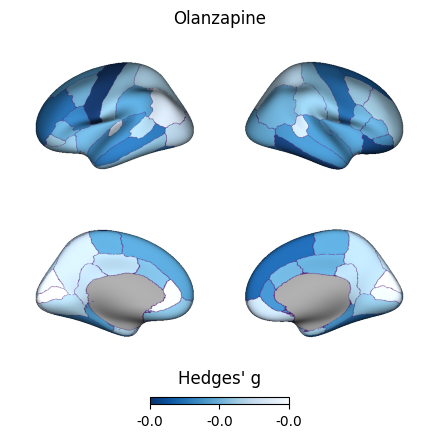

In [10]:
# plot within group effect size 

Wdat = pd.read_csv(base_path + '/data/STOPPD/parcelwise_withingroup.csv')

# make maps to plt
lh_dat = Wdat.loc[Wdat['parcel'].str.contains('lh_'),:]
rh_dat = Wdat.loc[Wdat['parcel'].str.contains('rh_'),:]

pmap = rois2maps(lh_dat, rh_dat, 'hedges_g', lh_labels, rh_labels)

surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 


p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(pmap, cmap='Blues_r', cbar_label='')
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title("Hedges' g", pad=10);
plt.title('Olanzapine');

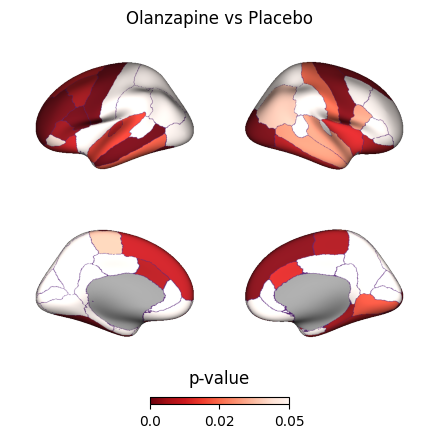

In [32]:
# plot 
surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(pmap, cmap='Reds_r', cbar_label='p-value', color_range = (0,0.05))
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title('p-value', pad=10);
plt.title('Olanzapine vs Placebo');
pic.savefig(os.path.join(base_path + '/figs/OLZ_parcelwise_groupdifference_pval.jpg'), dpi=300, transparent=True)


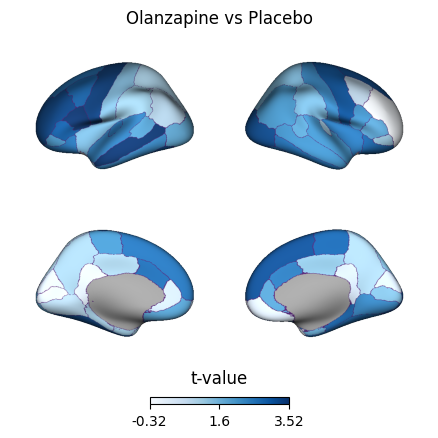

In [33]:
tmap = rois2maps(lh_dat, rh_dat, 't-value', lh_labels, rh_labels)

# plot 
surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(tmap, cmap='Blues', cbar_label='t-value')
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title('t-value', pad=10);
plt.title('Olanzapine vs Placebo');
pic.savefig(os.path.join(base_path + '/figs/OLZ_parcelwise_groupdifference_tval.jpg'), dpi=300, transparent=True)



In [34]:

Wdat = pd.read_csv(base_path + '/data/STOPPD/parcelwise_withingroup.csv')

# make maps to plt
lh_dat = Wdat.loc[Wdat['parcel'].str.contains('lh_'),:]
rh_dat = Wdat.loc[Wdat['parcel'].str.contains('rh_'),:]

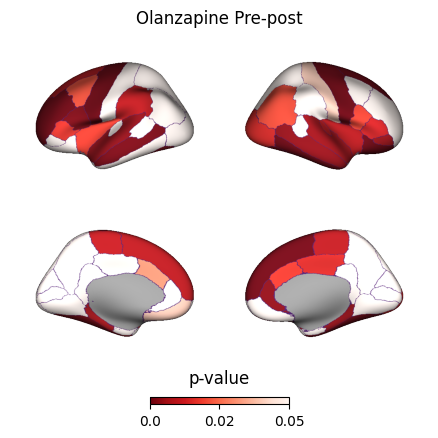

In [35]:
pmap = rois2maps(lh_dat, rh_dat, 'p-value', lh_labels, rh_labels)

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(pmap, cmap='Reds_r', cbar_label='p-value', color_range = (0,0.05))
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title('p-value', pad=10);
plt.title('Olanzapine Pre-post');

<Axes: xlabel='between', ylabel='within'>

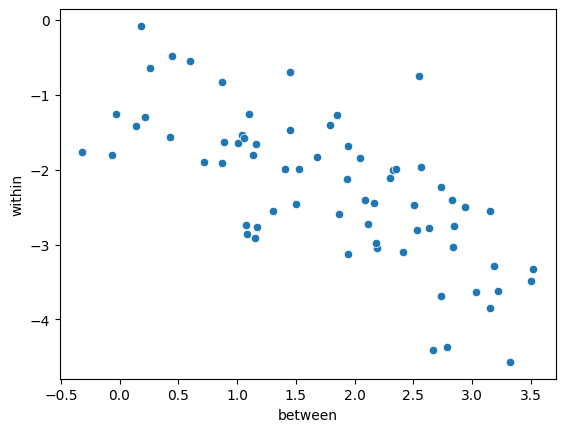

In [39]:
import seaborn as sns
df = pd.DataFrame({'between':Bdat['t-value'], 'within':Wdat['t-value']})
df
sns.scatterplot(df, x='between', y='within')